In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [21]:
data = pd.read_csv("data/combined_stats.csv", index_col=0)
# Missing column is awards_per (useless)
data = data.rename(columns={'USG%':'USG'})
print(data.columns[0:100])


Index(['Rk_g', 'Player', 'Age_g', 'Team_g', 'Pos_g', 'G_g', 'GS_g', 'MP_g',
       'FG_g', 'FGA_g', 'FG%_g', '3P_g', '3PA_g', '3P%_g', '2P_g', '2PA_g',
       '2P%_g', 'eFG%_g', 'FT_g', 'FTA_g', 'FT%_g', 'ORB_g', 'DRB_g', 'TRB_g',
       'AST_g', 'STL_g', 'BLK_g', 'TOV_g', 'PF_g', 'PTS_g', 'Awards_g',
       'PTS_tot', 'AST_tot', 'TRB_tot', 'STL_tot', 'BLK_tot', 'FT_tot',
       'FTA_tot', 'FG_tot', 'FGA_tot', '3P_tot', 'TOV_tot', 'Fpoints_tot',
       'Fpoints_avg_G', 'Fpoints_avg_min', 'Fpoints_per36', ' Rk', 'Pos_per',
       'Tm', 'G_per', 'MP_per', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Player-additional', 'Rk_per',
       'Team_per', 'Pos', 'G', 'GS_per', 'MP', 'FG_per', 'FGA_per', 'FG%_per',
       '3P_per', '3PA_per', '3P%_per', '2P_per', '2PA_per', '2P%_per',
       'eFG%_per', 'FT_per', 'FTA_per', 'FT%_per', 'ORB_per', 'DRB_per',
       'TRB_per', 'A

## Looking at stats with direct relation to fantasy:
- PTS
- AST
- REB
- STL
- 3PM
- BLK
- FG%
- FT%
- TO

In [24]:
# Removing players who are irrelevant to 12 team fantasy leagues
relevant = data[(data['MP_g'] > 10) & (data['G'] > 35)]
fantasy_related=['Player', 'MP_g', 'Fpoints_avg_G', 'Fpoints_avg_min', 'AST_g','TRB_g', 'STL_g', 'BLK_g', 
                 'FGA_g', 'FG%_g', '3P_g', '3P%_g', 'FT_g', 'FT%_g', 'PTS_g']
base_fantasy = relevant[fantasy_related]

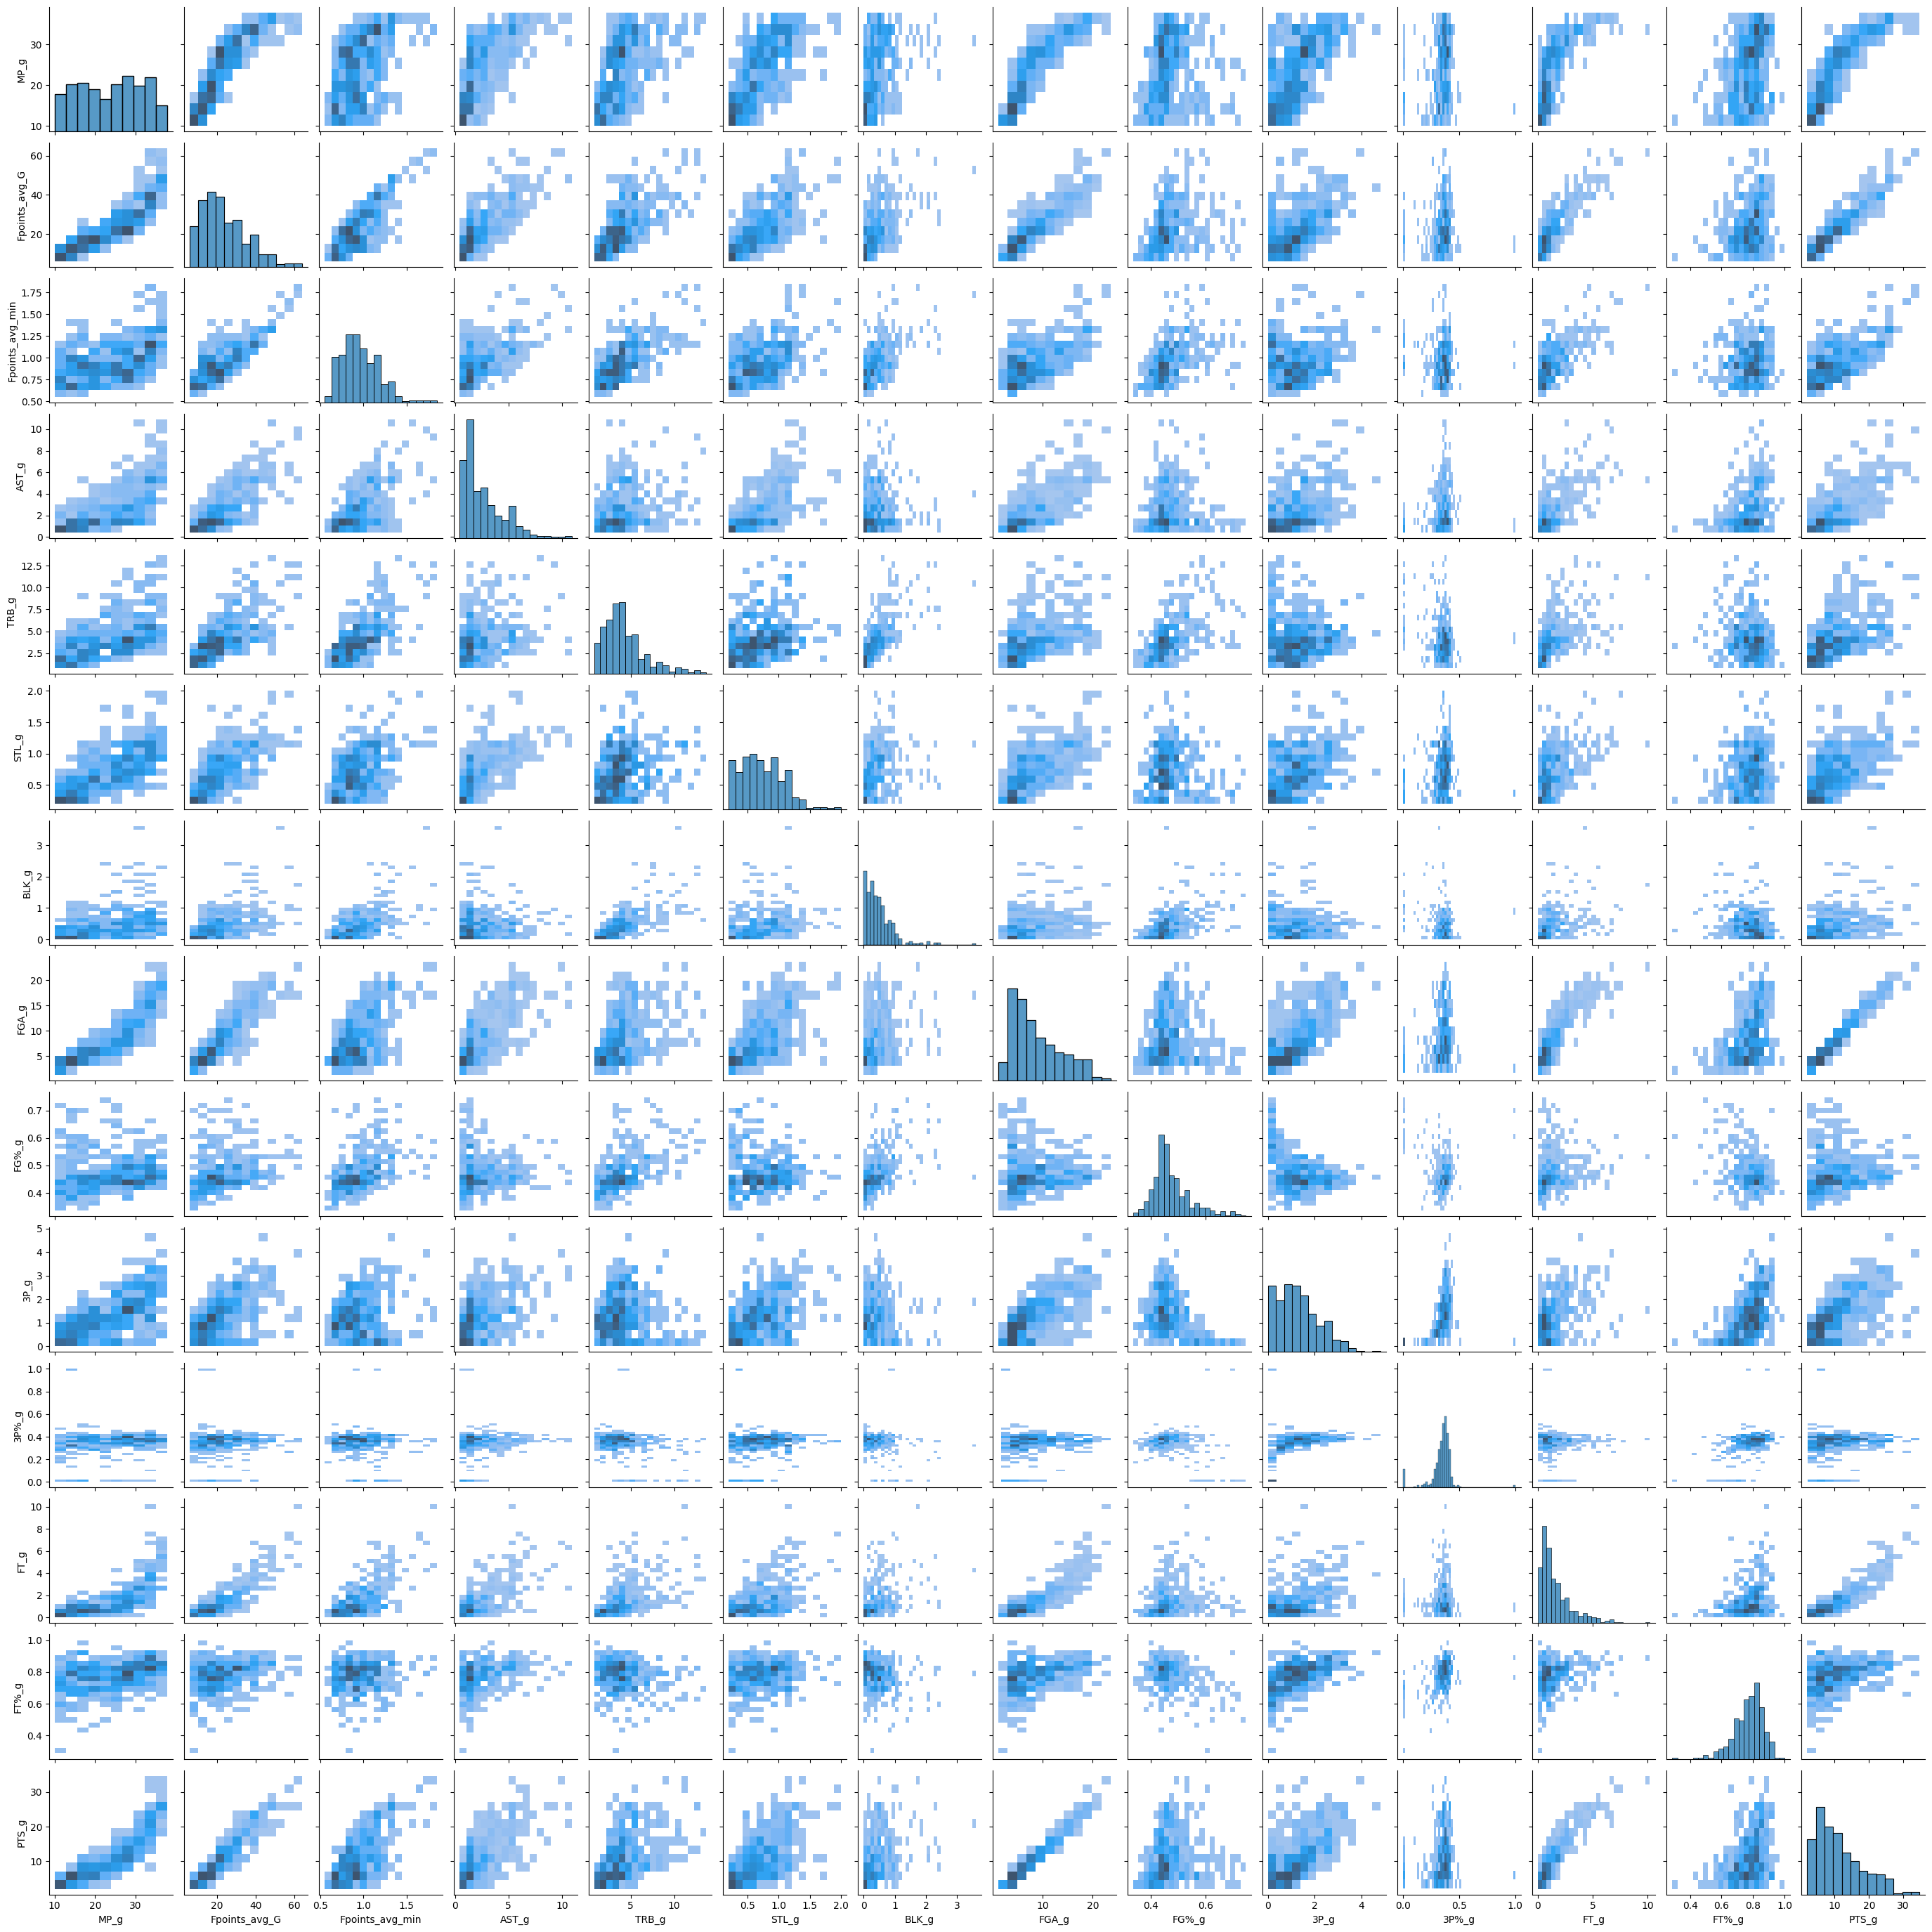

In [25]:
sn.pairplot(base_fantasy, kind='hist', height =2, aspect=1)

array([[<AxesSubplot: title={'center': 'MP_g'}>,
        <AxesSubplot: title={'center': 'Fpoints_avg_G'}>,
        <AxesSubplot: title={'center': 'Fpoints_avg_min'}>,
        <AxesSubplot: title={'center': 'AST_g'}>],
       [<AxesSubplot: title={'center': 'TRB_g'}>,
        <AxesSubplot: title={'center': 'STL_g'}>,
        <AxesSubplot: title={'center': 'BLK_g'}>,
        <AxesSubplot: title={'center': 'FGA_g'}>],
       [<AxesSubplot: title={'center': 'FG%_g'}>,
        <AxesSubplot: title={'center': '3P_g'}>,
        <AxesSubplot: title={'center': '3P%_g'}>,
        <AxesSubplot: title={'center': 'FT_g'}>],
       [<AxesSubplot: title={'center': 'FT%_g'}>,
        <AxesSubplot: title={'center': 'PTS_g'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

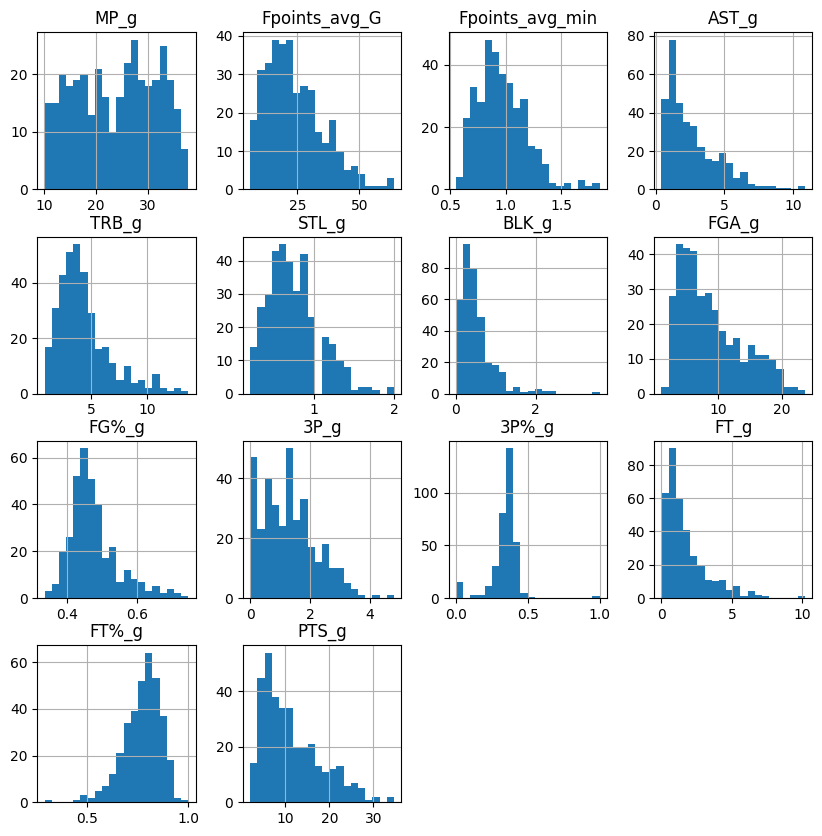

In [26]:
base_fantasy.hist(bins=20, figsize=(10,10))

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_4052/1438359253.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(base_fantasy.corr(), annot=True, vmin = -1, vmax = 1)


<AxesSubplot: >

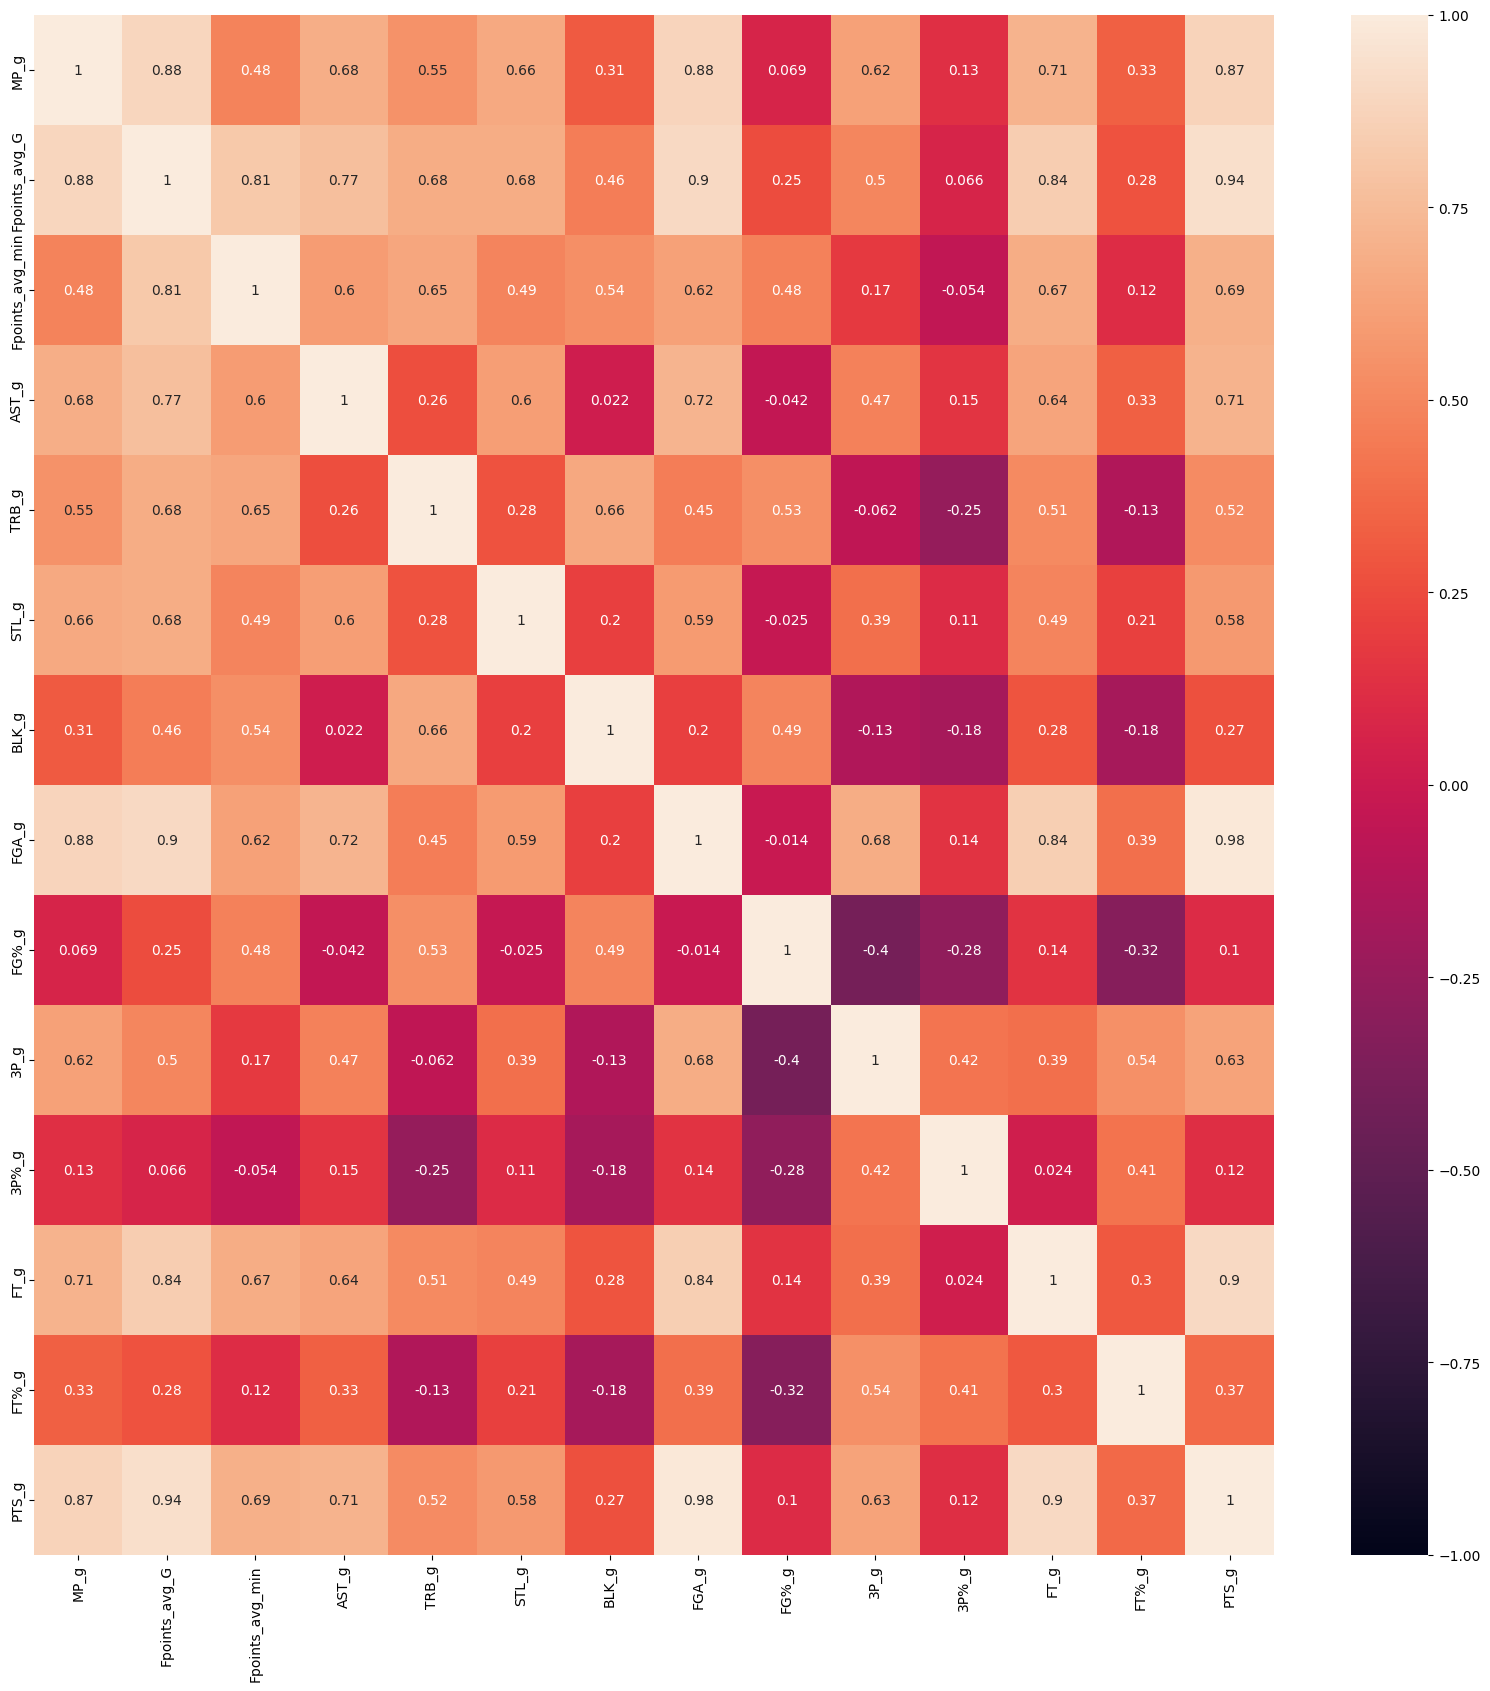

In [27]:
plt.figure(figsize=(20,20))
sn.heatmap(base_fantasy.corr(), annot=True, vmin = -1, vmax = 1)

In [28]:
# Looking into the best 25% of fantasy producers:
top_fantasy = base_fantasy[base_fantasy['Fpoints_avg_min'] > base_fantasy['Fpoints_avg_min'].quantile(0.75)]
top_fantasy

,Player,MP_g,Fpoints_avg_G,Fpoints_avg_min,AST_g,TRB_g,STL_g,BLK_g,FGA_g,FG%_g,3P_g,3P%_g,FT_g,FT%_g,PTS_g
0,Joel Embiid,33.6,62.1,1.848214,5.6,11.0,1.2,1.7,21.8,0.529,1.4,0.388,10.2,0.883,34.7
1,Luka Dončić,37.5,63.9,1.704000,9.8,9.2,1.4,0.5,23.6,0.487,4.1,0.382,6.8,0.786,33.9
2,Giannis Antetokounmpo,35.2,58.3,1.656250,6.5,11.5,1.2,1.1,18.8,0.611,0.5,0.274,7.0,0.657,30.4
3,Shai Gilgeous-Alexander,34.0,56.8,1.670588,6.2,5.5,2.0,0.9,19.8,0.535,1.3,0.353,7.6,0.874,30.1
4,Jalen Brunson,35.4,46.2,1.305085,6.7,3.6,0.9,0.2,21.4,0.479,2.7,0.401,5.5,0.847,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,Isaiah Jackson,13.1,17.9,1.366412,0.8,4.0,0.6,1.0,3.9,0.665,0.0,0.000,1.2,0.716,6.5
711,Luke Kornet,15.6,17.9,1.147436,1.1,4.1,0.4,1.0,3.2,0.700,0.0,1.000,0.8,0.907,5.3
724,Bol Bol,10.9,12.9,1.183486,0.4,3.2,0.2,0.6,3.5,0.616,0.5,0.423,0.3,0.789,5.2
756,Goga Bitadze,15.4,17.7,1.149351,1.3,4.6,0.5,1.2,3.4,0.603,0.0,0.143,0.9,0.655,5.0


/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_4052/2189158542.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(top_fantasy.corr(), annot=True, vmin = -1, vmax = 1)


<AxesSubplot: >

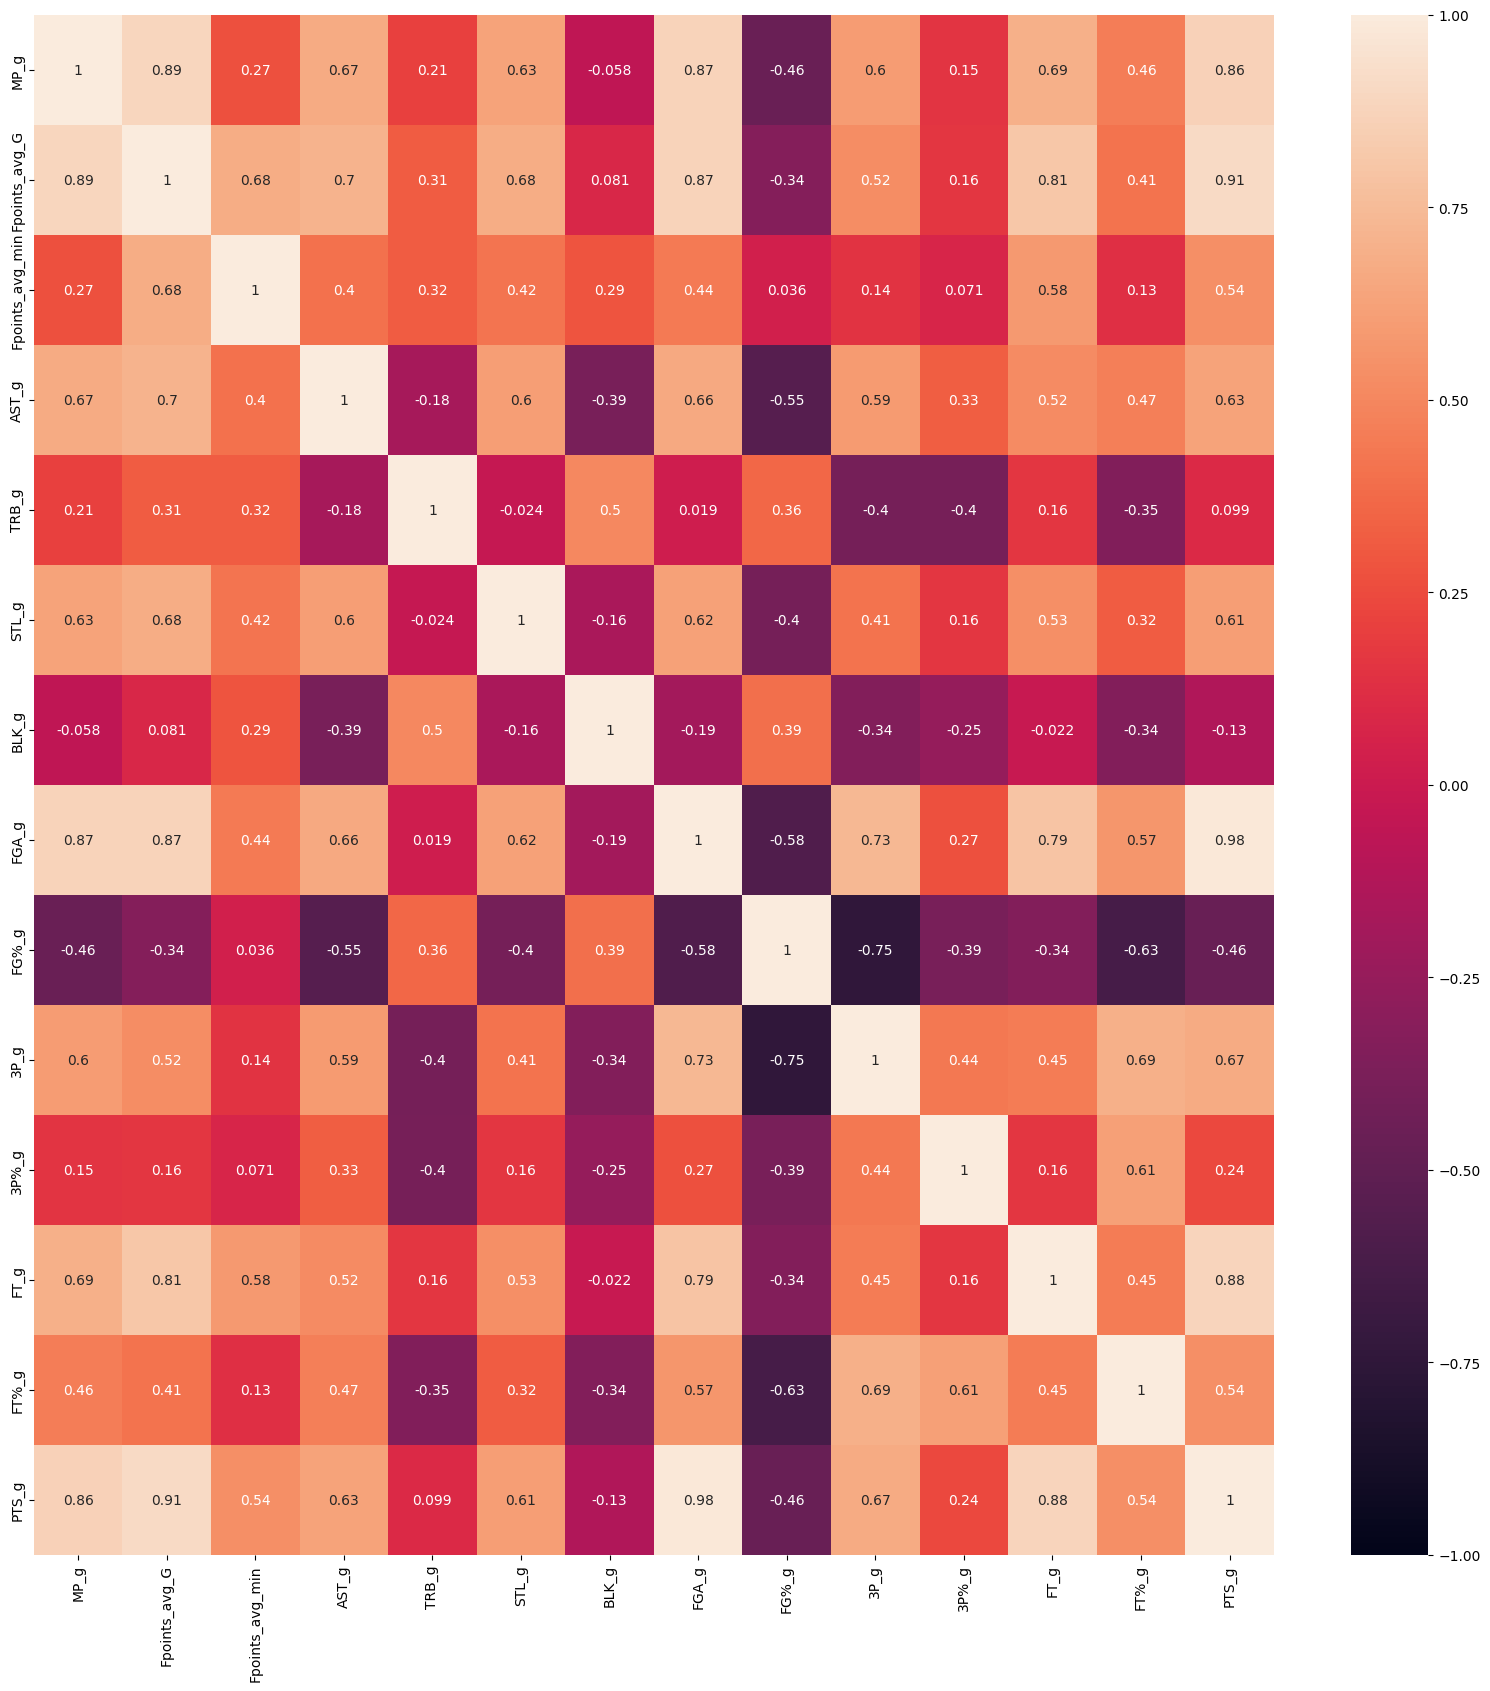

In [29]:
plt.figure(figsize=(20,20))
sn.heatmap(top_fantasy.corr(), annot=True, vmin = -1, vmax = 1)

In [31]:
base_fantasy.sort_values(by = 'STL_g', ascending=False).head(20)

,Player,MP_g,Fpoints_avg_G,Fpoints_avg_min,AST_g,TRB_g,STL_g,BLK_g,FGA_g,FG%_g,3P_g,3P%_g,FT_g,FT%_g,PTS_g
8,De'Aaron Fox,35.9,46.7,1.300836,5.6,4.6,2.0,0.4,20.9,0.465,2.9,0.369,4.2,0.738,26.6
3,Shai Gilgeous-Alexander,34.0,56.8,1.670588,6.2,5.5,2.0,0.9,19.8,0.535,1.3,0.353,7.6,0.874,30.1
9,Donovan Mitchell,35.3,48.4,1.371105,6.1,5.1,1.8,0.5,19.8,0.462,3.3,0.368,5.0,0.865,26.6
314,Alex Caruso,28.7,30.0,1.045296,3.5,3.8,1.7,1.0,7.6,0.468,1.9,0.408,1.0,0.760,10.1
681,Matisse Thybulle,22.9,19.1,0.834061,1.4,2.1,1.7,0.8,4.9,0.397,1.2,0.346,0.3,0.759,5.4
231,De'Anthony Melton,26.9,26.3,0.977695,3.0,3.7,1.6,0.4,9.5,0.386,2.0,0.360,1.7,0.835,11.1
24,Kawhi Leonard,34.3,45.9,1.338192,3.6,6.1,1.6,0.9,17.1,0.525,2.1,0.417,3.7,0.885,23.7
30,Paul George,33.8,40.7,1.204142,3.5,5.2,1.5,0.5,16.7,0.471,3.3,0.413,3.6,0.907,22.6
191,Jalen Suggs,27.0,26.5,0.981481,2.7,3.1,1.4,0.6,9.5,0.471,2.0,0.397,1.6,0.756,12.6
92,Fred VanVleet,36.8,43.2,1.173913,8.1,3.8,1.4,0.8,13.9,0.416,3.1,0.387,2.7,0.860,17.4
